In [1]:
import jax
import jax.numpy as np

from utils import *

from priors import *
from transformations import *
from likelihoods import *
from advi import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data

In [2]:
X_dense = np.load('X_dense.npy')
X_sparse = np.load('X_sparse.npy')
X_elliptic = np.load('X_elliptic.npy')

# Plotting

In [3]:
def plot_1d_samples(X, X_dom = [-1, 7]):
    fig, ax = plt.subplots()
    ax.hist(X, 40, rwidth=.82, range=X_dom)
    plt.show()
#

In [4]:
def plot_1d_likelihood(samples, sample_likelihoods):
    fig, ax = plt.subplots()
    ax.fill_between(samples, sample_likelihoods)
    plt.show()
#

In [5]:
def plot_2d_samples(X):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], alpha = 0.6)
    plt.show()
#

In [6]:
def plot_2d_likelihood_with_samples(X, x_grid_samples, y_grid_samples, gridded_likelihood, n_contours = 10):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], alpha = 0.6)
    ax.contour(x_grid_samples, y_grid_samples, gridded_likelihood, n_contours)
    plt.show()
#

In [7]:
def plot_2d_contour_distribution(x_grid_samples, y_grid_samples, gridded_likelihoods, contour_value):
    fig, ax = plt.subplots()
    for gridded_likelihood in gridded_likelihoods:
        ax.contour(x_grid_samples, y_grid_samples, gridded_likelihood, np.array([contour_value]))
    plt.show()
#

# Probabilistic model builders

## Simple 1D model
* Parameters: mean and precision
* Gaussian prior for the mean parameter, with mean hyperparameter set to 0 and mean precision parameter set to 1
* Inverse gamma prior for the precision parameter, with shape hyperparameter set to 1.5 and rate hyperparameter set to 0.1

Should return:
1. An initialization of the variational parameters for the mean and precision. All parameters initialized to zero.
2. The transformations for all model parameters.
3. The ELBO.

In [8]:
def assemble_1d_model(X, prior_precision=1.0, prior_shape=1.5, prior_rate=0.1):
    init_variational_params, log_priors, transformations = {}, {}, {}

    # Initialize variational parameters
    init_variational_params['mean'] = np.array([0.1, 1.0])  # [mean, variance]
    init_variational_params['precision'] = np.array([0.1, 1.0])  # [mean, variance]

    # Set up log priors
    log_priors['mean'] = gaussian_prior(0.0, prior_precision)
    log_priors['precision'] = gamma_prior(prior_shape, prior_rate)

    # Create transformations
    transformations['mean'] = MeanParamTransformation()
    transformations['precision'] = Precision1DParamTransformation()

    # Create the log-likelihood function
    log_likelihood = gaussian_1d_likelihood(X)

    # Create the ELBO function
    elbo = ELBO(log_priors, transformations, log_likelihood)

    return init_variational_params, transformations, elbo

## Simple 2D model
* Parameters: mean and precision
* Gaussian prior for the mean vector parameter, with mean hyperparameter set to 0, and mean precision parameter set to 1
* Wishart prior for the precision matrix parameter, with inverse scale matrix set to identity, and dof set to 4

Should return:

1. An initialization of the variational parameters for the mean and precision. All parameters initialized to zero.
2. The transformations for all model parameters.
3. The ELBO.

In [9]:
def assemble_2d_model(X, prior_precision = 1.0, dof = 2):
    init_variational_params, log_priors, transformations = {}, {}, {}
    
    return init_variational_params, transformations, elbo
#

# Dense sampling

In [13]:
T = 1000 # number of optimization steps

# Assemble the 1D model
init_variational_params, transformations, elbo = assemble_1d_model(X_dense)

# Revised with smaller initial step size
optimized_params = optimize(init_variational_params, elbo, T=T, init_step_size=0.01)

[DEBUG] Initial Variational Parameters: {'mean': Array([0.1, 1. ], dtype=float32), 'precision': Array([0.1, 1. ], dtype=float32)}
[DEBUG] Entropy (Untransformed): 2.837877035140991
[DEBUG] Mean Transformation Output: 0.10000000149011612
[DEBUG] Mean Transformation LDJ: 0.0
[DEBUG] Log-Det Jacobian for mean: 0.0
[DEBUG] Precision1D Transformation Output: 1.1051709651947021
[DEBUG] Precision1D LDJ: 0.1000000387430191
[DEBUG] Log-Det Jacobian for precision: 0.1000000387430191
[DEBUG] Sum of Log-Det Jacobians: 0.1000000387430191
[DEBUG] Entropy (Corrected with Jacobians): 2.9378771781921387
[DEBUG] Mean Transformation Output: Traced<ShapedArray(float32[])>with<BatchTrace(level=1/0)> with
  val = Array([0.7134219], dtype=float32)
  batch_dim = 0
[DEBUG] Precision1D Transformation Output: Traced<ShapedArray(float32[])>with<BatchTrace(level=1/0)> with
  val = Array([0.7059705], dtype=float32)
  batch_dim = 0
[DEBUG] Samples: {'mean': Traced<ShapedArray(float32[])>with<BatchTrace(level=1/0)> w

KeyboardInterrupt: 

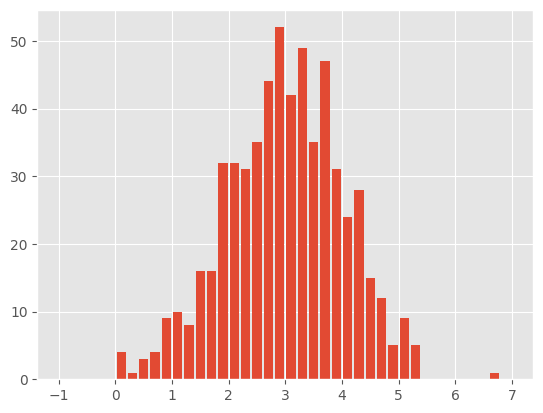

In [29]:
plot_1d_samples(X_dense)

## Likelihood evaluated at posterior mean (a point estimate)

In [30]:
# Extract the posterior mean for the mean and precision
posterior_mean = transformations['mean'].mean(optimized_params['mean'])
posterior_precision = transformations['precision'].mean(optimized_params['precision'])

# Create a Gaussian likelihood function using the posterior mean and precision
posterior_likelihood = gaussian_1d_likelihood(X_dense)

# Evaluate the likelihood over a range of values
X_samples = np.linspace(-1, 7, 200)
sample_likelihoods = np.exp(posterior_likelihood({'mean': posterior_mean, 'precision': posterior_precision}, reduce=False))

# Plot the likelihood
plot_1d_likelihood(X_samples, sample_likelihoods)

NameError: name 'transformations' is not defined

## Show draws from the mean parameter's variational distribution, as a histogram

In [ ]:
# Draw samples from the mean parameter's variational distribution
mean_samples = transformations['mean'].sample(optimized_params['mean'])

# Plot the samples as a histogram
plot_1d_samples(mean_samples)

## Show draws from the precision parameter's variational distribution, as a histogram

In [ ]:
# Draw samples from the precision parameter's variational distribution
precision_samples = transformations['precision'].sample(optimized_params['precision'])

# Plot the samples as a histogram
plot_1d_samples(precision_samples)

# Sparse sampling

In [ ]:
T = 1000 # number of optimization steps

# TODO: Assemble probabilistic model, optimize ELBO

## Observations

In [ ]:
plot_1d_samples(X_sparse)

## Likelihood evaluated at posterior mean (a point estimate)

In [ ]:
X_samples = np.linspace(-1, 7, 200)

## Show draws from the mean parameter's variational distribution, as a histogram

## Show draws from the precision parameter's variational distribution, as a histogram

# 2D Data

In [ ]:
T = 1000 # number of optimization steps

# TODO: Assemble probabilistic model, optimize ELBO

## Observations

In [ ]:
plot_2d_samples(X_elliptic)

## Likelihood evaluated at posterior mean (a point estimate)

In [ ]:
x_samples = np.linspace(-3, 3, 100)
y_samples = np.linspace(-2, 2, 100)
grid = np.reshape(np.stack(np.meshgrid(x_samples, y_samples),axis=-1), (-1, 2))

## Show draws from the mean parameter's variational distribution, as a scatterplot

## Show draws from the precision parameter's variational distribution, as a set of contours

In [ ]:
x_samples = np.linspace(-3, 3, 100)
y_samples = np.linspace(-2, 2, 100)
grid = np.reshape(np.stack(np.meshgrid(x_samples, y_samples),axis=-1), (-1, 2))